C:\Users\U S E R\AppData\Local\Temp\ipykernel_7932\3156927043.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ipl_data['winner'], order=ipl_data['winner'].value_counts().index, palette='viridis')


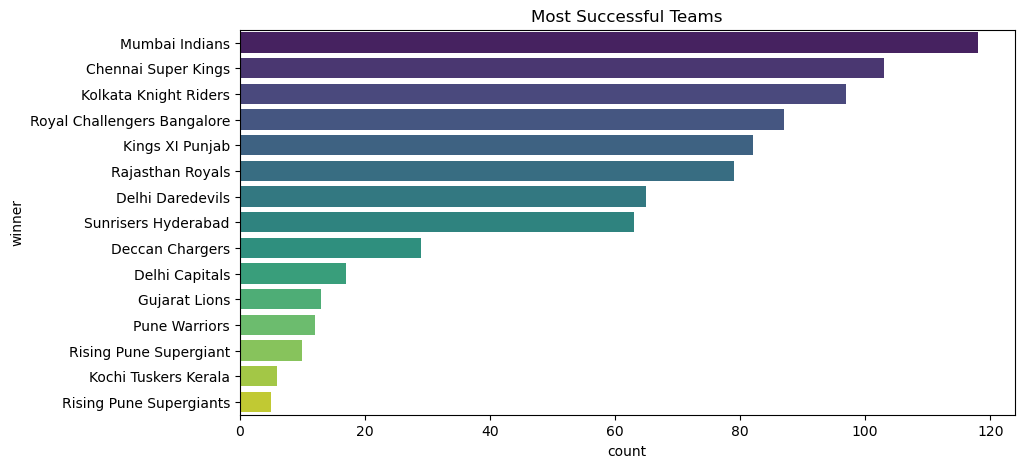

Toss Win to Match Win Percentage: 51.91%


C:\Users\U S E R\AppData\Local\Temp\ipykernel_7932\3156927043.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ipl_data['venue'], order=ipl_data['venue'].value_counts().index, palette='coolwarm')


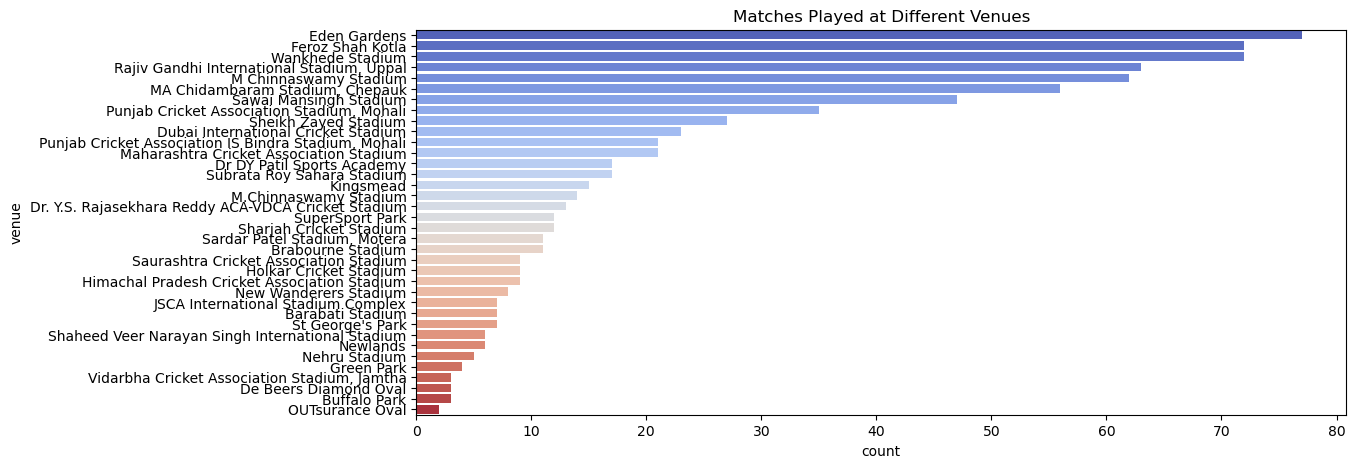

Match Winner Prediction MSE: 10.24


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load IPL Data
ipl_file_path = "IPL Matches 2008-2020.csv"
ipl_data = pd.read_csv(ipl_file_path)

# Data Preprocessing
ipl_data.drop(columns=['id', 'umpire1', 'umpire2', 'method'], inplace=True)
ipl_data.dropna(inplace=True)
ipl_data['date'] = pd.to_datetime(ipl_data['date'])

# EDA - Most Successful Teams
plt.figure(figsize=(10, 5))
sns.countplot(y=ipl_data['winner'], order=ipl_data['winner'].value_counts().index, palette='viridis')
plt.title("Most Successful Teams")
plt.show()

# Toss Impact Analysis
toss_win_effect = ipl_data[ipl_data['toss_winner'] == ipl_data['winner']]
toss_win_percentage = len(toss_win_effect) / len(ipl_data) * 100
print(f'Toss Win to Match Win Percentage: {toss_win_percentage:.2f}%')

# Venue Influence
plt.figure(figsize=(12, 5))
sns.countplot(y=ipl_data['venue'], order=ipl_data['venue'].value_counts().index, palette='coolwarm')
plt.title("Matches Played at Different Venues")
plt.show()

# Machine Learning - Predicting Match Winner using Linear Model
ipl_data['team1'] = ipl_data['team1'].astype('category').cat.codes
ipl_data['team2'] = ipl_data['team2'].astype('category').cat.codes
ipl_data['toss_winner'] = ipl_data['toss_winner'].astype('category').cat.codes
ipl_data['winner'] = ipl_data['winner'].astype('category').cat.codes

X = ipl_data[['team1', 'team2', 'toss_winner']]
y = ipl_data['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Linear Regression from Scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Linear Model
model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Match Winner Prediction MSE: {mse:.2f}')
